In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

10-0
20-0.25
30-0.50
40-0.75
50-1

### Importing Libraries
- `pandas` & `numpy` for data handling.
- `matplotlib.pyplot` & `seaborn` for visualization.
- `sklearn.model_selection` for train-test splitting.
- `sklearn.preprocessing.StandardScaler` for feature scaling.
- `LinearRegression` for model training.
- `mean_squared_error`, `r2_score` for performance evaluation.
- `fetch_california_housing` dataset used for regression tasks.


In [13]:
# Step 1: Data Collection
data= fetch_california_housing()   #pd.read_csv( )
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # Housing price as target

# Display first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Data Collection
- We use the `California Housing` dataset.
- Convert it into a DataFrame.
- Add a `Target` column representing median house value.
- Display the first five rows to inspect raw data.


In [14]:
df.info()
df.isnull().sum()

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Checking for Missing Values
- `df.info()` displays feature types and missing values.
- `df.isnull().sum()` ensures no missing data.

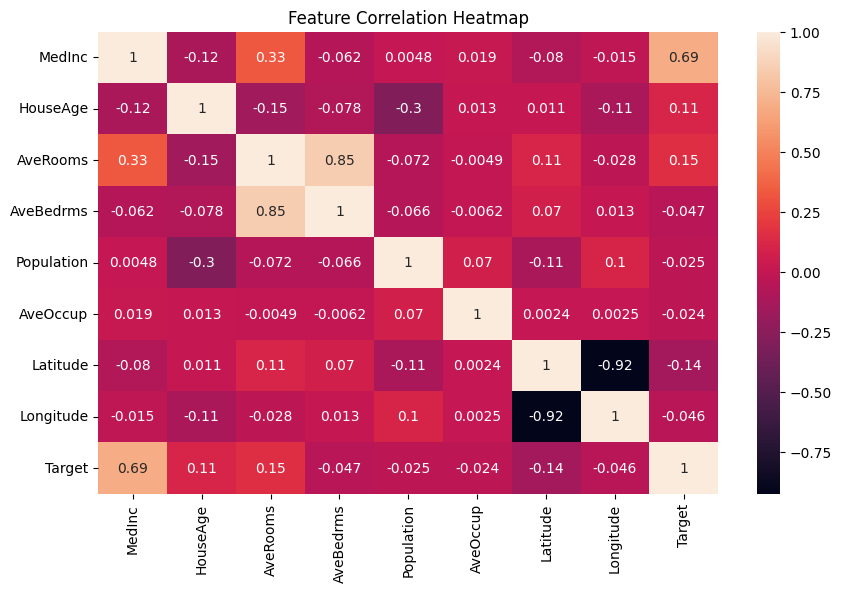

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True,  )
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Correlation Analysis
- A heatmap shows how strongly each feature is correlated with the target.
- Helps in selecting important features.


In [16]:
# Step 2: Data Preprocessing - Normalize features
scaler = StandardScaler()
df[data.feature_names] = scaler.fit_transform(df[data.feature_names])

# Display dataset after normalization
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


### Feature Normalization
- `StandardScaler()` ensures features have zero mean and unit variance.
- Prevents features with large values from dominating the model.

In [6]:
X = df[data.feature_names]  # Independent variables
y = df['Target']  # Dependent variable (House Price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of train and test sets
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### Splitting Data
- 80% training, 20% testing.
- Ensures the model generalizes well to unseen data.


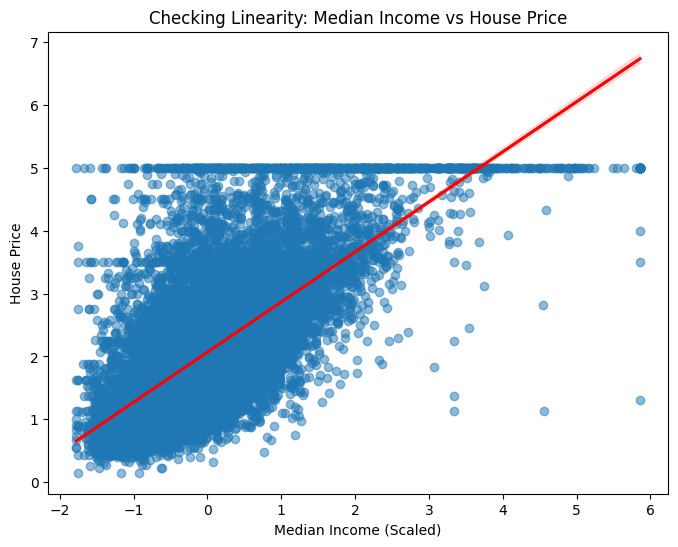

In [7]:
plt.figure(figsize=(8,6))
sns.regplot(x=X_train['MedInc'], y=y_train, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Median Income (Scaled)")
plt.ylabel("House Price")
plt.title("Checking Linearity: Median Income vs House Price")
plt.show()

### Checking Linearity
- We plot `Median Income` vs. `House Price` since income strongly influences price.
- The red line is the regression trendline.
- If points align closely with the red line, a linear relationship exists.
- If scattered randomly, a non-linear model may be better.

In [19]:
model = LinearRegression() #scaler=StandardScaler
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

# Convert predictions and actual values into a DataFrame
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

# Display first few rows
results_df.head()

,Actual,Predicted
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


### Model Predictions
- Use `predict()` to estimate house prices for test data.
- Compare actual vs. predicted values.


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 0.5559
R² Score: 0.5758


### Model Evaluation
- `Mean Squared Error (MSE)`: Measures average squared errors.
- `R² Score`: Measures how well predictions match actual values.

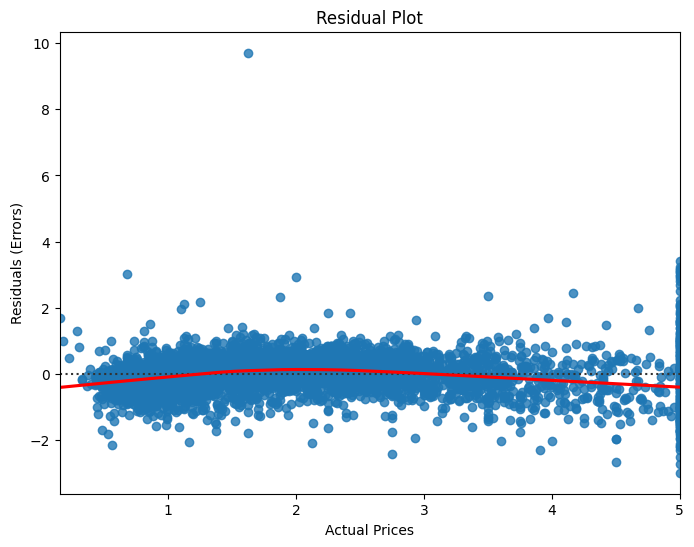

In [11]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Actual Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

### Residual Analysis
- A residual plot helps visualize prediction errors.
- If residuals are randomly scattered, it suggests a well-fitted model.


In [ ]:
sample = X_test.iloc[:5]
predictions = model.predict(sample)

# Display new predictions
pd.DataFrame(sample, columns=data.feature_names).assign(Predicted=predictions)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Predicted
20046,-1.152489,-0.289187,-0.499896,-0.156976,-0.029562,0.077681,0.200449,0.279366,0.719123
3024,-0.705015,0.108104,-0.157477,0.204301,0.123206,-0.037634,-0.230283,0.054757,1.764017
15663,-0.205588,1.856182,-0.586814,0.188231,-0.101972,-0.164679,1.015093,-1.432653,2.709659
20484,0.982710,-0.924851,0.296929,-0.161370,0.246834,0.035990,-0.632923,0.424114,2.838926
9814,-0.076678,0.425936,0.025864,-0.144836,-0.320086,-0.056520,0.462633,-1.178096,2.604657


### Predicting on New Data
- Model predicts house prices for unseen samples.
- Displays features and predicted prices.